In [1]:
import pandas as pd
icu = pd.read_csv("ICUData.csv")
icu

ID     sex  age           surgery  heart rate  temperature  bilirubin  \
0      1  female   76             other        98.0         36.5   6.512142   
1      2  female   60  gastrointestinal        80.0         38.1  14.523197   
2      3    male   66    cardiothoracic        99.6         37.4  22.972480   
3      4    male   74             other       110.0         39.1  19.299346   
4      5  female   68             other        94.1         38.5  39.076485   
..   ...     ...  ...               ...         ...          ...        ...   
495  496    male   62    cardiothoracic       118.0         37.3  13.234537   
496  497    male   67    cardiothoracic       115.0         38.0  10.740772   
497  498  female   53    cardiothoracic       131.0         37.9  14.131188   
498  499    male   68             other        86.9         36.0   9.596478   
499  500    male   75    cardiothoracic        92.0         37.6  11.660875   

     SAPS II  liver failure  LOS               outcome  
0         57              0    1                  died  
1         52              0    2                  home  
2         57              0    1  secondary care/rehab  
3         45              0    2                  home  
4         49              0    1                  home  
..       ...            ...  ...                   ...  
495       33              0    1  secondary care/rehab  
496       56              0    1                  died  
497       38              0    3  secondary care/rehab  
498       66              0    2                  home  
499       25              0    1  secondary care/rehab  

[500 rows x 11 columns]

### Metric Deƒüi≈ükenler

#### Tek Deƒüi≈ükenli (Univariate) Analiz

- Mesafeler ve hatta oranlar tanƒ±mlandƒ±ƒüƒ±ndan, metrik deƒüi≈ükenler durumunda daha ileri analizler m√ºmk√ºnd√ºr. A√ßƒ±k√ßa belirtilmediƒüi takdirde, tanƒ±tƒ±lan analizler aralƒ±k ve oran √∂l√ßekli deƒüi≈ükenler i√ßin de m√ºmk√ºnd√ºr. Muhtemelen verileri tanƒ±mlamak i√ßin en sƒ±k kullanƒ±lan istatistik aritmetik ortalamadƒ±r.
- Bu b√∂l√ºmde yine icu veri seti kullanƒ±lmaktadƒ±r. YB√ú'de kalƒ±nan s√ºre boyunca maksimum v√ºcut sƒ±caklƒ±ƒüƒ±nƒ±n aritmetik ortalamasƒ±nƒ± bulalƒ±m.

In [3]:
icu.temperature.mean()

37.663199999999996

Yani, aritmetik ortalama normal aralƒ±ƒüƒ±n sadece biraz √ºzerindedir. Aritmetik ortalamayƒ± virg√ºlden sonra tek basamaƒüa yuvarlamak i√ßin round fonksiyonu kullanƒ±lƒ±r.

In [7]:
round(icu.temperature.mean(), 1)

37.7

Aritmetik ortalamanƒ±n her zaman medyan ile kar≈üƒ±la≈ütƒ±rƒ±lmasƒ± tavsiye edilir, √ß√ºnk√º medyan verilerin ortasƒ±nƒ±n ba≈üka bir tanƒ±mƒ±nƒ± verir ve aykƒ±rƒ± deƒüerlere kar≈üƒ± √ßok saƒülamdƒ±r

In [11]:
import numpy as np
import statistics as st
np.median(icu.temperature)
st.median(icu.temperature)

37.7

Medyan ve aritmetik ortalama aynƒ± kabul edilebileceƒüinden, maksimum v√ºcut sƒ±caklƒ±ƒüƒ± daƒüƒ±lƒ±mƒ±nƒ±n aritmetik ortalama (medyan) etrafƒ±nda olduk√ßa simetrik olmasƒ± muhtemeldir. Buna ek olarak, ya hi√ß aykƒ±rƒ± deƒüer yoktur ya da pozitif ve negatif aykƒ±rƒ± deƒüerler birbirini n√∂tralize etmektedir. G√ºn cinsinden verilen LOS (kalƒ±≈ü s√ºresi) deƒüi≈ükenini kullanarak analizi tekrar edelim.

<Axes: xlabel='temperature', ylabel='Count'>

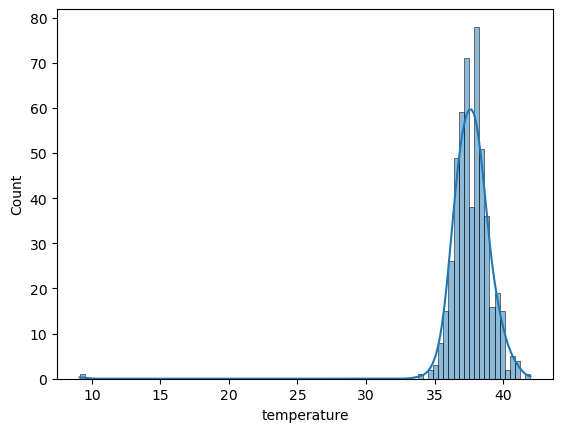

In [13]:
sns.histplot(icu.temperature, kde=True)

In [1]:
import plotly.express as px
px.box(icu.temperature)

NameError: name 'icu' is not defined

In [20]:
print(f"mean : {round(np.mean(icu.LOS), 1)}")
print(f"median : {np.median(icu.LOS)}")

mean : 5.3
median : 1.0


- Bu durumda, aritmetik ortalama ile medyan arasƒ±nda a√ßƒ±k bir fark g√∂r√ºyoruz. Ya LOS daƒüƒ±lƒ±mƒ± √ßarpƒ±ktƒ±r (daha doƒürusu saƒüa √ßarpƒ±ktƒ±r ya da aritmetik ortalamayƒ± saƒüa √ßeken aykƒ±rƒ± deƒüerler vardƒ±r). 

<Axes: xlabel='LOS', ylabel='Count'>

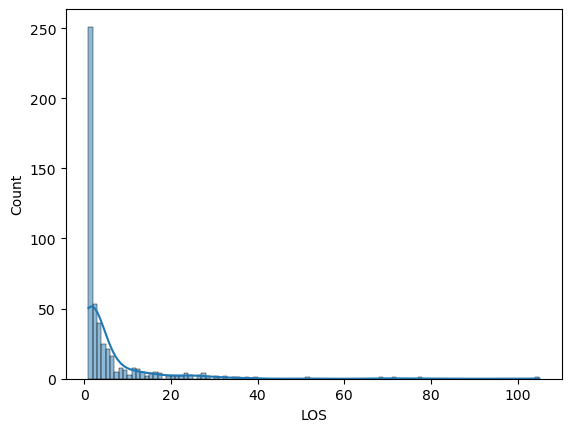

In [21]:
sns.histplot(icu.LOS, kde=True)

- Verilerin diyagramlarƒ±nƒ± ele aldƒ±ƒüƒ±mƒ±z a≈üaƒüƒ±da bu iki durumu ayƒ±rt edebileceƒüiz. Bir diƒüer konum parametresi, g√∂receli deƒüi≈üiklikler durumunda uygulanan geometrik ortalamadƒ±r. Bu konum √∂l√ß√ºs√º yalnƒ±zca kesin pozitif veriler i√ßin anlamlƒ± bir ≈üekilde tanƒ±mlanƒ±r.

![image](figure10.png)

A≈üaƒüƒ±daki a√ßƒ±klamada, geometrik ve aritmetik ortalama arasƒ±ndaki √∂nemli bir baƒülantƒ± a√ßƒ±klanmaktadƒ±r.

![image](figure11.png)

Yani, logaritmasƒ± alƒ±nmƒ±≈ü g√∂zlemlerin aritmetik ortalamasƒ±, logaritma tabanƒ±nƒ±n √∂nemsiz olduƒüu geometrik ortalamanƒ±n logaritmasƒ±na e≈üittir. Doƒüal logaritma (ln) se√ßilirse, e-fonksiyonu  uygulanarak yazƒ±labilir.

![image](figure12.png)

√ústel bir b√ºy√ºme veya azalma izleyen s√ºre√ßler g√∂zlemleniyorsa, verilerin logaritmasƒ±nƒ± almak ve logaritmasƒ± alƒ±nmƒ±≈ü g√∂zlemleri analiz etmek genellikle daha kolaydƒ±r. Bu durum √∂rneƒüin icu veri setinde yer alan bilirubin √∂l√ß√ºmleri i√ßin ge√ßerlidir.

<Axes: xlabel='bilirubin', ylabel='Count'>

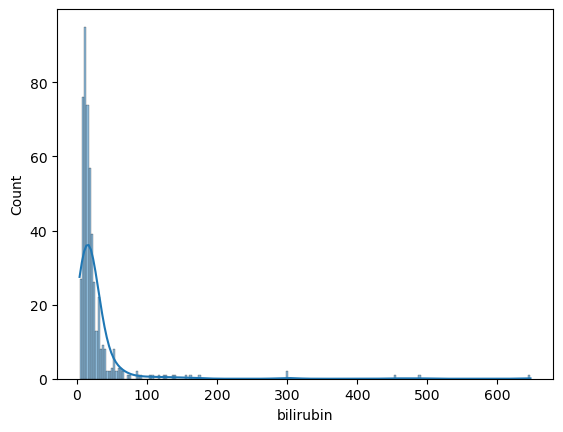

In [25]:
sns.histplot(icu.bilirubin, kde=True)

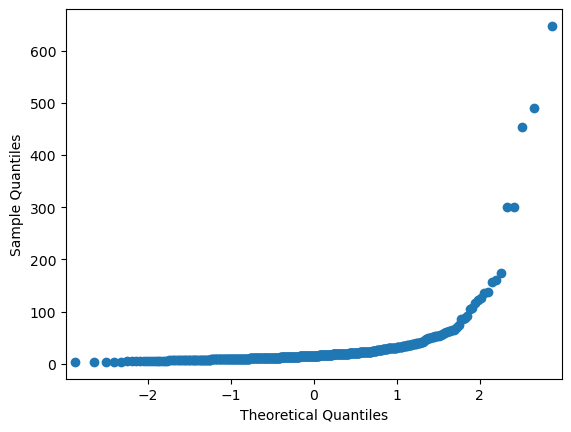

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(icu.bilirubin)
plt.show()

In [3]:
from scipy.stats import gmean
import math

math.log(gmean(icu.bilirubin))

2.8473262538107837

In [9]:
from statistics import mean
import numpy as np
mean(np.log(icu.bilirubin))

2.847326253810784

In [10]:
np.exp(mean(np.log(icu.bilirubin)))

17.24162043918728

In [11]:
gmean(icu.bilirubin)

17.241620439187272

Uygulamada, sadece konum deƒüil, g√∂zlemlerin daƒüƒ±lƒ±mƒ± da ilgi √ßekicidir. Muhtemelen en sƒ±k uygulanan daƒüƒ±lƒ±m √∂l√ß√ºs√º,**varyansƒ±n karek√∂k√º olan standart sapmadƒ±r**

![image](figure13.png)

![image](figure14.png)

Varyans kavramƒ±nƒ± bir veri k√ºmesine uygularsak, √∂rneklem varyansƒ± ile pop√ºlasyon varyansƒ± arasƒ±nda ayrƒ±m yapƒ±labilir. Pop√ºlasyon varyansƒ± yukarƒ±da g√∂sterilen varyanstƒ±r ve pop√ºlasyonun tamamƒ±ndan elde edilen verileri ve $œÉ^{2}\$ ifadesini kullanarak hesaplanabilir.

√ñrnek varyansƒ± $S^{2}\$ olarak g√∂sterilir ve bunu belirli bir pop√ºlasyondan alƒ±nan bir √∂rnek ve a≈üaƒüƒ±daki ifade kullanƒ±larak hesaplanabilir:

![image](figure15.png)

Bu ifade $œÉ^{2}\$'yi hesaplamak i√ßin kullanƒ±lan ifadeye olduk√ßa benzemektedir, ancak bu durumda xi √∂rneklemdeki bireysel g√∂zlemleri temsil ederken X √∂rneklemin ortalamasƒ±dƒ±r.


$\\S^{2}$ yaygƒ±n olarak bir √∂rnek veri kullanarak bir pop√ºlasyonun varyansƒ±nƒ± ($\\œÉ^{2}$) tahmin etmek i√ßin kullanƒ±lƒ±r. Ancak, $S^{2}\$  sistematik olarak pop√ºlasyon varyansƒ±nƒ± olduƒüundan d√º≈ü√ºk tahmin eder. Bu nedenle, pop√ºlasyon varyansƒ±nƒ±n yanlƒ± bir tahmincisi olarak adlandƒ±rƒ±lƒ±r.

B√ºy√ºk bir √∂rneƒüe sahip olduƒüumuzda, $\\S^{2}$ $\\œÉ^{2}$ i√ßin yeterli bir tahminci olabilir. K√º√ß√ºk √∂rneklemler i√ßin √ßok d√º≈ü√ºk olma eƒüilimindedir. Bu durumda, $\\œÉ^{2}$'yi daha iyi tahmin etmek i√ßin kullanabilecek ba≈üka bir basit istatistik vardƒ±r. ƒ∞≈üte denklemi:

![image](figure16.png)

Bu, √∂nceki ifadeye olduk√ßa benzemektedir. Bu durumda n yerine n - 1'e b√∂l√ºyoruz. Buna **Bessel d√ºzeltmesi** denir. **Bessel d√ºzeltmesi**, $\\S^{2}_{n-1}$'in pop√ºlasyon varyansƒ± i√ßin en iyi yansƒ±z tahmin edici olduƒüunu g√∂sterir. Dolayƒ±sƒ±yla, pratikte, bir veri √∂rneƒüi kullanarak bir pop√ºlasyonun varyansƒ±nƒ± tahmin etmek i√ßin bu denklem kullanƒ±lƒ±r. $\\S^{2}_{n-1}$ n - 1 serbestlik dereceli varyans olarak da bilinir

In [14]:
from statistics import variance, stdev

variance(icu.temperature);

In [15]:
stdev(icu.temperature)

1.7354738543112644

Aritmetik ortalama ve medyan kar≈üƒ±la≈ütƒ±rmasƒ±na benzer ≈üekilde, ≈üimdi de standart sapma ile medyan mutlak sapmasƒ±nƒ± kar≈üƒ±la≈ütƒ±ralƒ±m.

In [16]:
stdev(icu.temperature)

1.7354738543112644

In [23]:
from statsmodels import robust
robust.mad(icu.temperature)

1.1860817748044774

Her iki istatistik arasƒ±nda a√ßƒ±k bir fark vardƒ±r. Ya sƒ±caklƒ±k daƒüƒ±lƒ±mƒ± aritmetik ortalama etrafƒ±nda simetrik bir daƒüƒ±lƒ±mla tanƒ±mlanamƒ±yor ya da standart sapmayƒ± bozan aykƒ±rƒ± deƒüerler var. Bunun nedenini a≈üaƒüƒ±da belirleyeceƒüiz.

Pozitif √∂l√ß√ºmler s√∂z konusu olduƒüunda, uygulamada genellikle a≈üaƒüƒ±daki standartla≈ütƒ±rƒ±lmƒ±≈ü daƒüƒ±lƒ±m √∂l√ß√ºs√º kullanƒ±lƒ±r.

**Coefficent of Variation**

![image](figure17.png)

- Deƒüi≈üim katsayƒ±sƒ± boyutsuz bir b√ºy√ºkl√ºkt√ºr ve genellikle y√ºzde olarak verilir; yani aritmetik ortalamaya g√∂re y√ºzdesel daƒüƒ±lƒ±mdƒ±r. Sonu√ß olarak, sadece oran √∂l√ßekli deƒüi≈ükenlere uygulanmalƒ±dƒ±r.

- Kantillere dayalƒ± varyasyon katsayƒ±sƒ± √ße≈üitleri vardƒ±r. Se√ßeneklerden biri medyan ve MAD'e dayanmaktadƒ±r

  ![image](figure18.png)

  Alternatif olarak, √ßeyrek daƒüƒ±lƒ±m katsayƒ±sƒ± olarak adlandƒ±rƒ±lan √ßeyrekler de kullanƒ±labilir

  ![image](figure19.png)


In [20]:
stdev(icu.temperature) / mean(icu.temperature)

0.046078767983370086

In [21]:
from statistics import median
robust.mad(icu.temperature) / median(icu.temperature)

0.03146105503460152

In [22]:
from scipy.stats import iqr
iqr(icu.temperature) / median(icu.temperature)

0.03978779840848806

Sƒ±rasƒ±yla aritmetik ortalama, medyan etrafƒ±nda yakla≈üƒ±k %3-5 aralƒ±ƒüƒ±nda sadece k√º√ß√ºk varyasyonlar olduƒüu g√∂r√ºlmektedir.

In [24]:
from scipy.stats import gstd
gstd(icu.temperature)

1.07326731736915

Konum ve √∂l√ßek √∂l√ß√ºlerine ek olarak, metrik deƒüi≈ükenler s√∂z konusu olduƒüunda ≈üekil √∂l√ß√ºleri de kullanƒ±lƒ±r. Bir ≈üekil simetri √∂l√ß√ºs√º √ßarpƒ±klƒ±ktƒ±r (skewness).

![image](figure20.png)

Skew (ùë•1 , ... , ùë•ùëõ ) < 0 ise veri daƒüƒ±lƒ±mƒ± sola √ßarpƒ±k, Skew (ùë•1 , ... , ùë•ùëõ ) > 0 ise saƒüa √ßarpƒ±ktƒ±r.\

Bir daƒüƒ±lƒ±mƒ±n √ßarpƒ±klƒ±ƒüƒ± aritmetik ortalama ve medyan kullanƒ±larak da belirlenebilir. Eƒüer AM (ùë•1 , ... , ùë•ùëõ ) < medyan (ùë•1 , ... , ùë•ùëõ ) ise daƒüƒ±lƒ±m sola √ßarpƒ±ktƒ±r. Tersine, AM (ùë•1 , ... , ùë•ùëõ ) > medyan (ùë•1 , ... , ùë•ùëõ ) ise daƒüƒ±lƒ±m saƒüa √ßarpƒ±ktƒ±r.

![image](figure21.png)

In [26]:
from scipy.stats import skew

skew(icu.temperature)

-8.800959897847758

Sola √ßarpƒ±k bir daƒüƒ±lƒ±ma i≈üaret eden bu sonu√ß, medyan ve aritmetik ortalamanƒ±n (a≈üaƒüƒ± yukarƒ±) aynƒ± olduƒüu ve simetrik bir daƒüƒ±lƒ±ma kanƒ±t te≈ükil ettiƒüi yukarƒ±daki g√∂zlemimizle √ßeli≈ümektedir. √ñl√ß√ºlen sƒ±caklƒ±klara daha yakƒ±ndan bakƒ±ldƒ±ƒüƒ±nda, 398 numaralƒ± hastanƒ±n maksimum (!) v√ºcut sƒ±caklƒ±ƒüƒ±nƒ±n 9,1‚ó¶ ùê∂ gibi anormal derecede d√º≈ü√ºk olduƒüu g√∂r√ºlmektedir (√∂l√ß√ºm ya da transkripsiyon hatasƒ±?). Hesaplamayƒ± 398 numaralƒ± hasta olmadan tekrarlƒ±yoruz. Hasta 398'in maksimum v√ºcut sƒ±caklƒ±ƒüƒ±na eri≈ümek i√ßin k√∂≈üeli parantez ve indeksini kullanabiliriz.

In [2]:
icu.temperature[397]
icu[icu["temperature"] == 9.1]

ID   sex  age surgery  heart rate  temperature  bilirubin  SAPS II  \
397  398  male   81   other       123.0          9.1   20.23374       99   

     liver failure  LOS outcome  
397              0    1    died

In [37]:
skew(icu.temperature.drop(397))

0.31523806699087253

≈ûimdi, √ßarpƒ±klƒ±k √ßok k√º√ß√ºkt√ºr ve ilk izlenimimizi doƒürulamaktadƒ±r. Hasta 398 olmadan deƒüerlerin daƒüƒ±lƒ±mƒ± aritmetik ortalama etrafƒ±nda olduk√ßa simetriktir. Ayrƒ±ca, 398 numaralƒ± hastanƒ±n √ßƒ±karƒ±lmasƒ± standart sapmayƒ± da azaltmaktadƒ±r.

In [38]:
stdev(icu.temperature.drop(397))

1.1731873166428928

Bu da ≈üu anda standartla≈ütƒ±rƒ±lmƒ±≈ü MAD'ye √ßok yakƒ±ndƒ±r.

Kalƒ±≈ü s√ºresi (LOS) i√ßin √ßarpƒ±klƒ±ƒüƒ± hesaplayalƒ±m. Aritmetik ortalama ve medyana dayanarak, yukarƒ±da daƒüƒ±lƒ±mƒ±n saƒüa √ßarpƒ±k olmasƒ± gerektiƒüi sonucuna varmƒ±≈ütƒ±k. Dolayƒ±sƒ±yla, pozitif bir √ßarpƒ±klƒ±k deƒüeri bekleriz.

In [39]:
skew(icu.LOS)

4.895505496636184

**Basƒ±klƒ±k (Kurtosis)**

![image](figure22.png)

Kurt (ùë•1 , ... , ùë•ùëõ ) < 0 ise veri daƒüƒ±lƒ±mƒ± platikurtik, Kurt (ùë•1 , ... , ùë•ùëõ ) > 0 ise leptokurtiktir.

Basƒ±klƒ±ƒüƒ± tanƒ±mlamak i√ßin referans normal daƒüƒ±lƒ±mdƒ±r. Normal daƒüƒ±lƒ±mƒ±n basƒ±klƒ±ƒüƒ± 0'dƒ±r. Negatif bir basƒ±klƒ±k g√∂zlemlersek, daƒüƒ±lƒ±m normal daƒüƒ±lƒ±mdan daha d√ºz ve daha az kavislidir. Basƒ±klƒ±k pozitifse, daƒüƒ±lƒ±m normal daƒüƒ±lƒ±mdan daha dik ve daha kavislidir;

![image](figure23.png)

In [41]:
from scipy.stats import kurtosis
kurtosis(icu.temperature)

145.05652943229478

In [42]:
kurtosis(icu.temperature.drop(397))

0.3566105994244779

Bir kez daha, tek bir g√∂zlemin etkisinin ne kadar b√ºy√ºk olabileceƒüi g√∂r√ºlm√º≈üt√ºr. Daƒüƒ±lƒ±mƒ±n a≈üƒ±rƒ± leptokurtik olmadƒ±ƒüƒ±, ancak bir g√∂zlem dƒ±≈üƒ±nda normal daƒüƒ±lƒ±m tarafƒ±ndan olduk√ßa iyi tanƒ±mlanabileceƒüi sonucuna varƒ±yoruz. Kalƒ±≈ü s√ºresinin (LOS) basƒ±klƒ±ƒüƒ±:

In [43]:
kurtosis(icu.LOS)

33.74164008536902

LOS'un leptokurtic olduƒüu g√∂r√ºlmektedir.

Histogramlarƒ± kullanarak daƒüƒ±lƒ±mƒ± daha ileri d√ºzeyde analiz edelim. Histogram, bir metrik deƒüi≈ükenin aralƒ±ƒüƒ±nƒ± ardƒ±≈üƒ±k aralƒ±klara b√∂lerek elde edilen √∂zel bir √ßubuk grafik t√ºr√ºd√ºr. Her aralƒ±k i√ßin, dahil edilen g√∂zlemlerin mutlak veya g√∂receli frekansƒ± bir √ßubuk ile g√∂rselle≈ütirilir. Aralƒ±klarƒ± se√ßmek i√ßin, yazƒ±lƒ±m programlarƒ± tarafƒ±ndan otomatik olarak bir dizi e≈üit uzunlukta aralƒ±k se√ßmek i√ßin kullanƒ±lan bazƒ± temel kurallar vardƒ±r. Ancak, √ßoƒüu durumda aralƒ±klarƒ± elle se√ßmek ve baƒülama uygun bir b√∂l√ºm se√ßmek daha iyidir. Maksimum v√ºcut sƒ±caklƒ±klarƒ±nƒ±n bir histogramƒ±nƒ± olu≈üturulmu≈ütur.

<Axes: xlabel='temperature', ylabel='Count'>

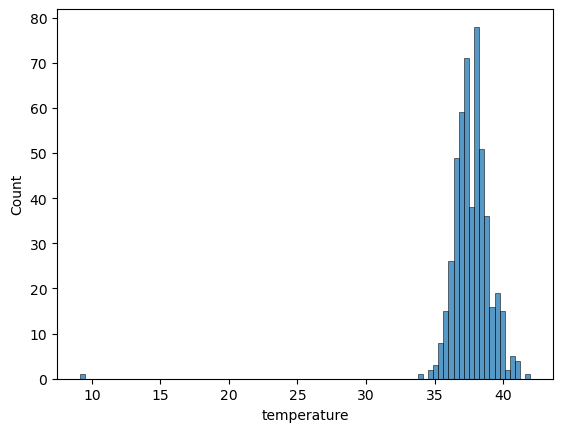

In [4]:
import seaborn as sns
sns.histplot(icu.temperature)

[(33.0, 43.0),
 Text(0.5, 0, 'Maximum Body Temperature'),
 Text(0, 0.5, 'Absolute Frequency'),
 Text(0.5, 1.0, '500 ICU Patients')]

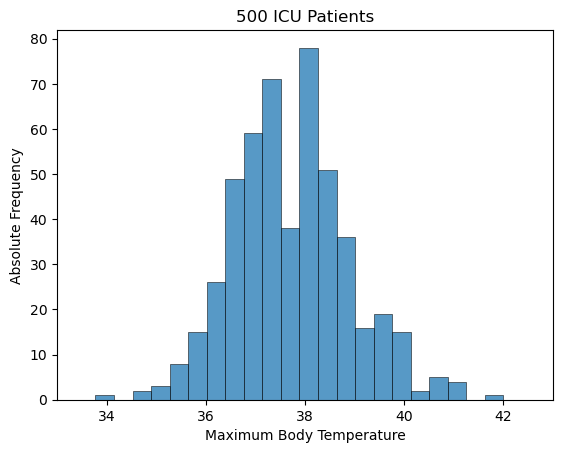

In [5]:
hst = sns.histplot(icu.temperature)
hst.set(xlim=(33,43), xlabel="Maximum Body Temperature", 
        ylabel="Absolute Frequency", title="500 ICU Patients")

Grafik, √∂nceki hesaplamalarƒ±mƒ±zƒ± doƒürulamaktadƒ±r; yani, daƒüƒ±lƒ±m aritmetik ortalama etrafƒ±nda olduk√ßa simetriktir ve YB√ú pop√ºlasyonundaki maksimum v√ºcut sƒ±caklƒ±ƒüƒ±nƒ±n daƒüƒ±lƒ±mƒ± (g√º√ßl√º d√º≈ü√ºk soƒüutma/hipotermisi olan hastalar hari√ß) muhtemelen normal bir daƒüƒ±lƒ±mla iyi bir ≈üekilde tanƒ±mlanmaktadƒ±r.

[Text(0.5, 0, 'Long of Stay in Days'),
 Text(0, 0.5, 'Absolute Frequency'),
 Text(0.5, 1.0, '500 ICU Patients')]

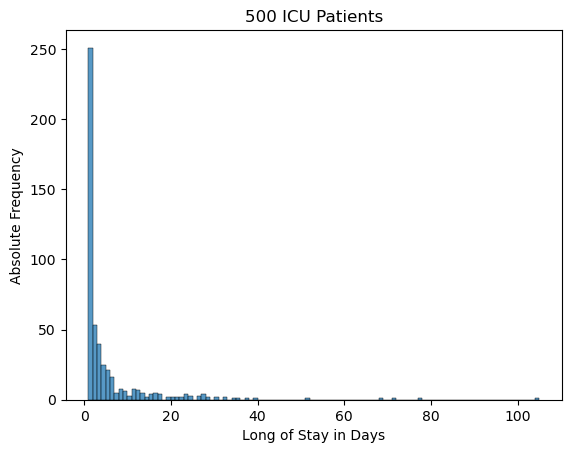

In [8]:
hst = sns.histplot(icu.LOS, binwidth=1)
hst.set(xlabel="Long of Stay in Days", 
        ylabel="Absolute Frequency", title="500 ICU Patients")

≈ûekil √∂nceki hesaplamalarƒ± doƒürulamaktadƒ±r. A√ßƒ±k√ßa saƒüa √ßarpƒ±k ve olduk√ßa sivri bir daƒüƒ±lƒ±m elde edilmekte. Hastalarƒ±n √ßoƒüunluƒüu sadece birka√ß g√ºnl√ºk bir ya≈üam s√ºresine sahiptir. Maksimum ya≈üam s√ºresi 105 g√ºnd√ºr.

Alternatif olarak, g√∂zlemlenen deƒüerlerin daƒüƒ±lƒ±mƒ± tahmini yoƒüunluklarƒ± aracƒ±lƒ±ƒüƒ±yla g√∂rselle≈ütirilebilir. 

Yoƒüunluk grafiklerini d√ºzle≈ütirilmi≈ü histogramlarƒ±n grafikleri olarak d√º≈ü√ºn√ºlebilir.  Yoƒüunluk grafikleri √ßoƒüunlukla bir kernel yoƒüunluk tahmini kullanƒ±r. Kernel yoƒüunluk tahmini, g√ºr√ºlt√ºy√º yumu≈üatarak daha d√ºzg√ºn daƒüƒ±lƒ±mlar elde edilmesini saƒülar.

Yoƒüunluk grafikleri, histogramlar dikkate alƒ±ndƒ±ƒüƒ±nda √∂nemli bir parametre olan kutu(bin) sayƒ±sƒ±ndan etkilenmez, bu nedenle verilerin daƒüƒ±lƒ±mƒ±nƒ± daha iyi g√∂rselle≈ütirmeye olanak tanƒ±r.



<Axes: xlabel='temperature', ylabel='Density'>

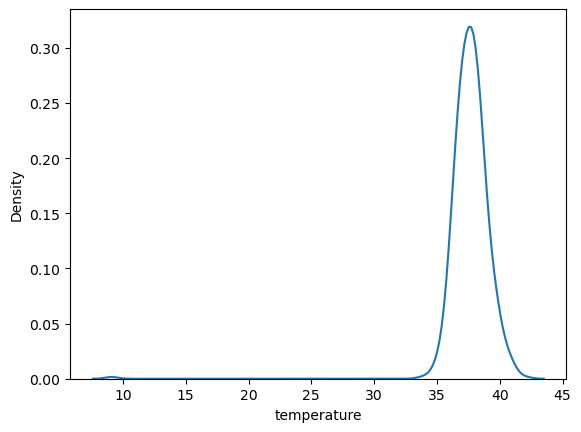

In [61]:
sns.kdeplot(icu.temperature)

<Axes: xlabel='temperature', ylabel='Density'>

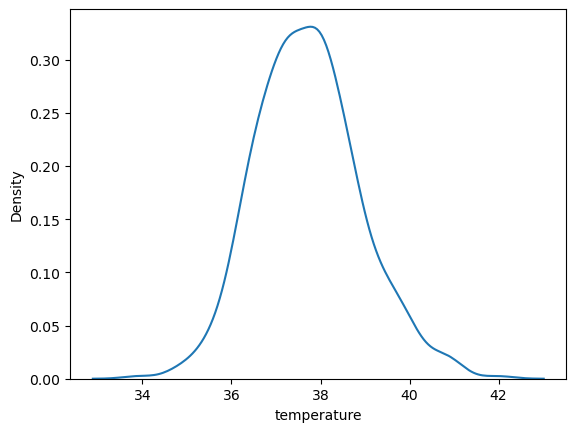

In [62]:
sns.kdeplot(icu.temperature.drop(397))

<Axes: ylabel='Density'>

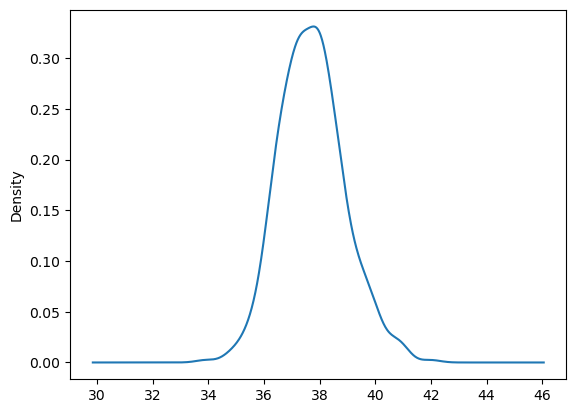

In [63]:
icu.temperature.drop(397).plot(kind="density")

Aritmetik ortalama etrafƒ±nda olduk√ßa simetrik bir yoƒüunluk elde edildiƒüi g√∂r√ºlmektedir.

<Axes: xlabel='temperature', ylabel='Count'>

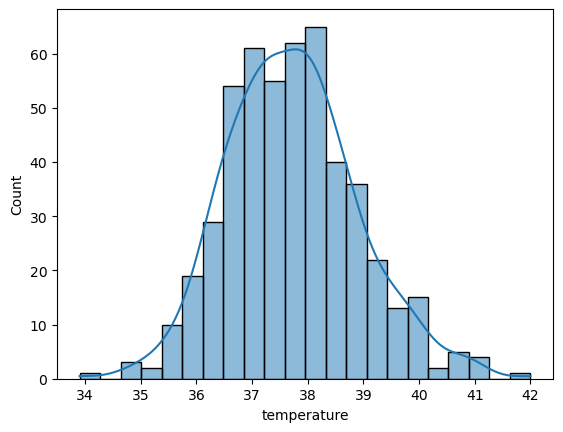

In [69]:
sns.histplot(icu.temperature.drop(397), kde=True)

In [70]:
# plotnine https://realpython.com/ggplot-python/

Maksimum v√ºcut sƒ±caklƒ±ƒüƒ±nƒ±n daƒüƒ±lƒ±mƒ± ampirik k√ºm√ºlatif daƒüƒ±lƒ±m fonksiyonu aracƒ±lƒ±ƒüƒ±yla da g√∂rselle≈ütirebilir.burada yine 398 numaralƒ± hastayƒ± atlayacaƒüƒ±z.

<Axes: xlabel='temperature', ylabel='Proportion'>

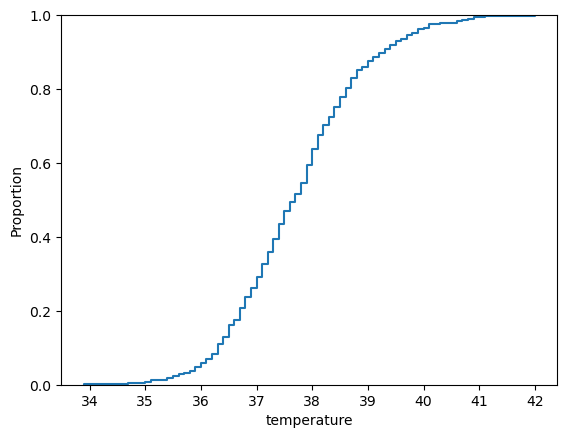

In [9]:
sns.ecdfplot(data=icu.temperature.drop(397))

Verilerin ampirik daƒüƒ±lƒ±mƒ±nƒ± g√∂stermenin bu yollarƒ±nƒ±n bir diƒüer √∂nemli uygulamasƒ±, varsayƒ±lan bir olasƒ±lƒ±k modelinin daƒüƒ±lƒ±mƒ± ile kar≈üƒ±la≈ütƒ±rmaktƒ±r. Bunu yaparken, varsayƒ±lan bir modelin grafiksel olarak doƒürulanmasƒ± m√ºmk√ºnd√ºr. ƒ∞leriki derslerde bundan da bahsedilecektir.

#### Bivariate Analysis

Metrik deƒüi≈ükenler arasƒ±ndaki ili≈ükinin g√ºc√º ve y√∂n√º, sƒ±ralƒ± verilerde olduƒüu gibi korelasyon yoluyla tanƒ±mlanabilir. Sƒ±ralama korelasyonlarƒ±nƒ±n yanƒ± sƒ±ra Pearson korelasyonu da kullanƒ±labilir.

![image](figure24.png)

Pearson korelasyonu [-1; 1] aralƒ±ƒüƒ±nda deƒüerler alabilir; burada 1 m√ºkemmel pozitif doƒürusal ili≈ükiyi ve -1 m√ºkemmel negatif doƒürusal ili≈ükiyi temsil eder.

In [72]:
from scipy.stats import pearsonr

pearsonr(icu.temperature, icu["heart rate"])

PearsonRResult(statistic=0.17630666238406734, pvalue=7.384039483665922e-05)

Zayƒ±f bir pozitif ili≈üki vardƒ±r; yani v√ºcut sƒ±caklƒ±ƒüƒ± arttƒ±k√ßa kalp atƒ±≈ü hƒ±zƒ± da artma eƒüilimindedir.

Verileri bir daƒüƒ±lƒ±m diyagramƒ± aracƒ±lƒ±ƒüƒ±yla √ßizilir ve b√∂ylece doƒürusal bir ili≈üki varsayƒ±mƒ±nƒ±n haklƒ± olup olmadƒ±ƒüƒ± da doƒürulanƒ±r.

<Axes: xlabel='temperature', ylabel='heart rate'>

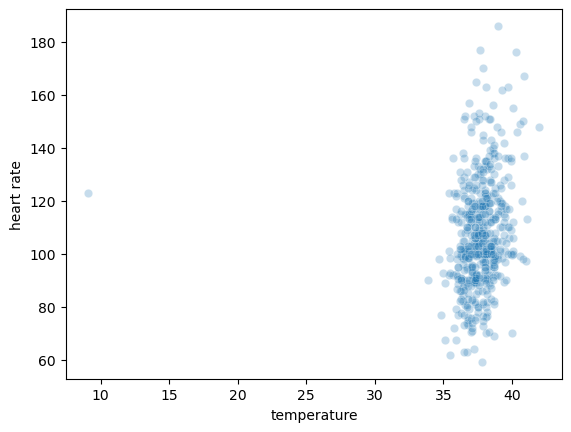

In [75]:
sns.scatterplot(x=icu.temperature, y=icu["heart rate"], alpha=0.25)

In [76]:
pearsonr(icu.temperature.drop(397), icu["heart rate"].drop(397))

PearsonRResult(statistic=0.2978033285606186, pvalue=1.118148500008259e-11)

In [80]:
from scipy import stats
print(stats.spearmanr(icu.temperature, icu["heart rate"]))
print(stats.spearmanr(icu.temperature.drop(397), icu["heart rate"].drop(397)))

SignificanceResult(statistic=0.26599572175445046, pvalue=1.5207779303155718e-09)
SignificanceResult(statistic=0.27072412991880884, pvalue=7.870418648465133e-10)


In [82]:
print(stats.kendalltau(icu.temperature, icu["heart rate"]))
print(stats.kendalltau(icu.temperature.drop(397), icu["heart rate"].drop(397)))

SignificanceResult(statistic=0.18269029154469063, pvalue=1.9348573865883658e-09)
SignificanceResult(statistic=0.1858803609351711, pvalue=1.0499001854398001e-09)


Her iki sƒ±ra korelasyonu da √ßok az deƒüi≈ümektedir. Dolayƒ±sƒ±yla, sƒ±ralamalara ge√ßi≈ü, aykƒ±rƒ± deƒüerlere kar≈üƒ± niceliklerle kar≈üƒ±la≈ütƒ±rƒ±labilecek belirli bir saƒülamlƒ±k olu≈üturmaktadƒ±r. 